<a href="https://colab.research.google.com/github/MeghanGH/data-analyst-with-python-datacamp/blob/main/Exploratory_Data_Analysis_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive


In [2]:
drive.mount('/content/drive')
clean_books = '/content/drive/My Drive/Colab Notebooks/DataAnalysisWithPython_DataCamp/clean_books.csv'
clean_unemployment = '/content/drive/My Drive/Colab Notebooks/DataAnalysisWithPython_DataCamp/clean_unemployment.csv'
divorce = '/content/drive/My Drive/Colab Notebooks/DataAnalysisWithPython_DataCamp/divorce.csv'


Mounted at /content/drive


### Getting to know dataset

In [3]:

books = pd.read_csv(clean_books)
books.head()

,name,author,rating,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,2019,Childrens


In [4]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    350 non-null    object 
 1   author  350 non-null    object 
 2   rating  350 non-null    float64
 3   year    350 non-null    int64  
 4   genre   350 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 13.8+ KB


In [5]:
books.dtypes

name       object
author     object
rating    float64
year        int64
genre      object
dtype: object

In [6]:
books["year"] = books["year"].astype(int)
books.dtypes

name       object
author     object
rating    float64
year        int64
genre      object
dtype: object

In [7]:
books.describe()

,rating,year
count,350.000000,350.000000
mean,4.608571,2013.508571
std,0.226941,3.284711
min,3.300000,2009.000000
25%,4.500000,2010.000000
50%,4.600000,2013.000000
75%,4.800000,2016.000000
max,4.900000,2019.000000


In [8]:

print(books.value_counts('genre'))
print('\n')
print(books['genre'].value_counts())

genre
Non Fiction    179
Fiction        131
Childrens       40
dtype: int64


Non Fiction    179
Fiction        131
Childrens       40
Name: genre, dtype: int64


### Validating categorical data

In [9]:
books['genre'].isin(['Fiction', 'Non Fiction'])

0       True
1       True
2       True
3       True
4      False
       ...  
345     True
346     True
347     True
348     True
349    False
Name: genre, Length: 350, dtype: bool

In [10]:
books[books['genre'].isin(['Fiction', 'Non Fiction'])].head()

,name,author,rating,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,2017,Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,2011,Fiction


In [11]:
# book genre not is in

books[~books['genre'].isin(['Fiction', 'Non Fiction'])].head()

,name,author,rating,year,genre
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,2019,Childrens
26,Baby Touch and Feel: Animals,DK,4.6,2015,Childrens
36,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,2017,Childrens
37,"Cabin Fever (Diary of a Wimpy Kid, Book 6)",Jeff Kinney,4.8,2011,Childrens
53,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,2015,Childrens


In [12]:
print(books['year'].min())
print(books['year'].max())

2009
2019


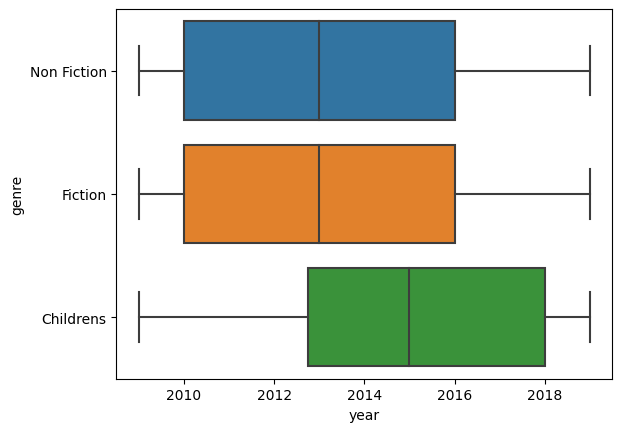

In [13]:
sns.boxplot(data=books, x='year', y='genre')
plt.show()

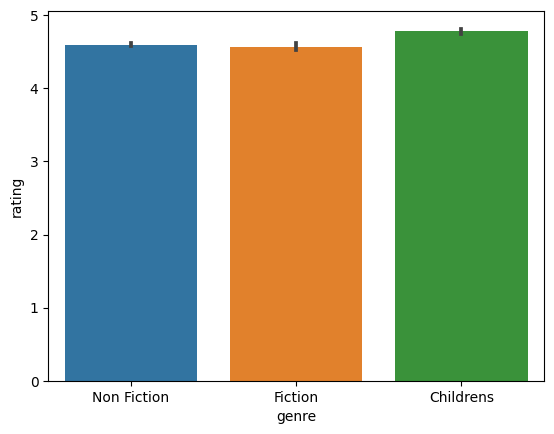

In [14]:
sns.barplot(data=books, x='genre', y='rating')
plt.show()

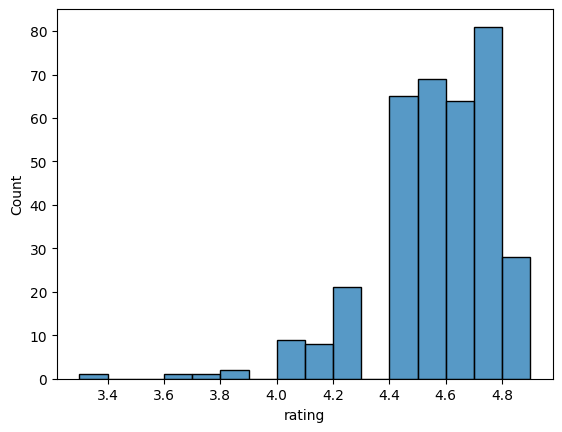

In [15]:
sns.histplot(data=books, x="rating", binwidth=0.1)
plt.show()

In [16]:
unemployment = pd.read_csv(clean_unemployment)
unemployment.head()

,country_code,country_name,continent,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,AFG,Afghanistan,Asia,11.35,11.05,11.34,11.19,11.14,11.13,11.16,11.18,11.15,11.22,11.71,13.28
1,AGO,Angola,Africa,9.43,7.36,7.35,7.37,7.37,7.39,7.41,7.41,7.42,7.42,8.33,8.53
2,ALB,Albania,Europe,14.09,13.48,13.38,15.87,18.05,17.19,15.42,13.62,12.30,11.47,13.33,11.82
3,ARE,United Arab Emirates,Asia,2.48,2.30,2.18,2.04,1.91,1.77,1.64,2.46,2.35,2.23,3.19,3.36
4,ARG,Argentina,South America,7.71,7.18,7.22,7.10,7.27,7.52,8.11,8.35,9.22,9.84,11.46,10.90


### **boxplot**

0.26 33.56


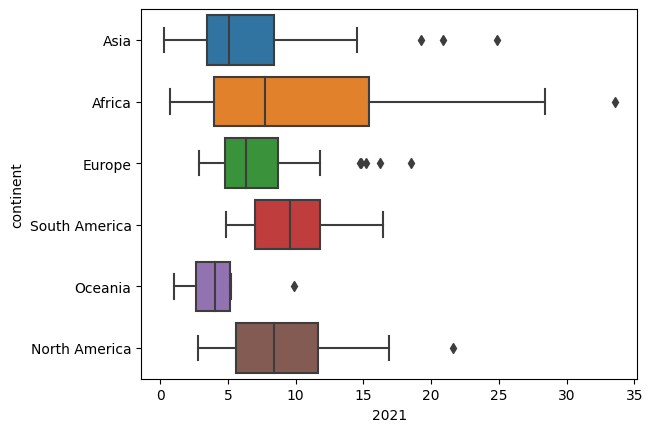

In [17]:
# Print the minimum and maximum unemployment rates during 2021
print(unemployment["2021"].min(), unemployment["2021"].max())

# Create a boxplot of 2021 unemployment rates, broken down by continent
sns.boxplot(data=unemployment, x="2021", y="continent")
plt.show()

### Group by

In [18]:
books.groupby('genre').mean()

<ipython-input-18-64446ba9a446>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  books.groupby('genre').mean()


,rating,year
genre,,
Childrens,4.780000,2015.075000
Fiction,4.570229,2013.022901
Non Fiction,4.598324,2013.513966


In [19]:
books.agg(['mean', 'std'])

<ipython-input-19-0ac9b699b61f>:1: FutureWarning: ['name', 'author', 'genre'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  books.agg(['mean', 'std'])


,rating,year
mean,4.608571,2013.508571
std,0.226941,3.284711


In [20]:
books.agg({'rating': ['mean', 'std'], 'year': ['median']})

,rating,year
mean,4.608571,NaN
std,0.226941,NaN
median,NaN,2013.0


In [21]:
books.groupby("genre").agg(
    mean_rating = ('rating', 'mean'),
    std_rating = ('rating', 'std'),
    median_year = ('year', 'median')
)

,mean_rating,std_rating,median_year
genre,,,
Childrens,4.780000,0.122370,2015.0
Fiction,4.570229,0.281123,2013.0
Non Fiction,4.598324,0.179411,2013.0


In [22]:
# Print yearly mean and standard deviation grouped by continent
print(unemployment.groupby('continent').agg(['mean', 'std']))

                    2010                 2011                 2012            \
                    mean       std       mean       std       mean       std   
continent                                                                      
Africa          9.343585  7.411259   9.369245  7.401556   9.240755  7.264542   
Asia            6.240638  5.146175   5.942128  4.779575   5.835319  4.756904   
Europe         11.008205  6.392063  10.947949  6.539538  11.325641  7.003527   
North America   8.663333  5.115805   8.563333  5.377041   8.448889  5.495819   
Oceania         3.622500  2.054721   3.647500  2.008466   4.103750  2.723118   
South America   6.870833  2.807058   6.518333  2.801577   6.410833  2.936508   

                    2013                 2014            ...      2017  \
                    mean       std       mean       std  ...      mean   
continent                                                ...             
Africa          9.132453  7.309285   9.121321  7.291359  

<ipython-input-22-90c677b57259>:2: FutureWarning: ['country_code', 'country_name'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  print(unemployment.groupby('continent').agg(['mean', 'std']))


In [23]:
continent_summary = unemployment.groupby("continent").agg(
    # Create the mean_rate_2021 column
    mean_rate_2021 = ('2021', 'mean'),
    # Create the std_rate_2021 column
    std_rate_2021 = ('2021', 'std'),
)
print(continent_summary)

               mean_rate_2021  std_rate_2021
continent                                   
Africa              10.473585       8.131636
Asia                 6.906170       5.414745
Europe               7.414872       3.947825
North America        9.155000       5.076482
Oceania              4.280000       2.671522
South America        9.924167       3.611624


## Data Cleaning and Imputation
Exploring and analyzing data often means dealing with missing values, incorrect data types, and outliers. In this chapter, you’ll learn techniques to handle these issues and streamline your EDA processes!

In [31]:
salaries = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DataAnalysisWithPython_DataCamp/ds_salaries_clean.csv')
salaries.head()

,Working_Year,Designation,Experience,Employment_Status,Employee_Location,Company_Size,Remote_Working_Ratio,Salary_USD
0,2020,Data Scientist,Mid,FT,DE,L,0,76227.0
1,2020,Machine Learning Scientist,Senior,FT,JP,S,0,248257.0
2,2020,Big Data Engineer,Senior,FT,GB,M,50,104100.0
3,2020,Product Data Analyst,Mid,FT,HN,S,0,19097.0
4,2020,Machine Learning Engineer,Senior,FT,US,L,50,143225.0


In [33]:
# finding missing value

print(salaries.isna().sum())

Working_Year            0
Designation             0
Experience              0
Employment_Status       0
Employee_Location       0
Company_Size            0
Remote_Working_Ratio    0
Salary_USD              0
dtype: int64


### Dropping missing values 5% or less of total values

In [34]:
threshold = len(salaries) * 0.05
threshold

30.35

In [35]:
cols_to_drop = salaries.columns[salaries.isna().sum() <= threshold]
cols_to_drop

Index(['Working_Year', 'Designation', 'Experience', 'Employment_Status',
       'Employee_Location', 'Company_Size', 'Remote_Working_Ratio',
       'Salary_USD'],
      dtype='object')

In [36]:
salaries.dropna(subset=cols_to_drop, inplace = True)

In [37]:
cols_with_missing_values = salaries.columns[salaries.isna().sum() > 0]
cols_with_missing_values

Index([], dtype='object')

In [38]:
for col in cols_with_missing_values[:-1]:
  salaries[col].fillna(salaries[col].mode()[0])

In [39]:
print(salaries.isna().sum())

Working_Year            0
Designation             0
Experience              0
Employment_Status       0
Employee_Location       0
Company_Size            0
Remote_Working_Ratio    0
Salary_USD              0
dtype: int64


### Imputing by sub-group

In [40]:
salaries_dict = salaries.groupby('Experience')['Salary_USD'].median().to_dict()
salaries_dict

{'Entry': 53948.0, 'Executive': 163694.5, 'Mid': 73465.0, 'Senior': 129380.0}

In [44]:
type(salaries.groupby('Experience')['Salary_USD'].median())

pandas.core.series.Series

In [45]:
salaries['Salary_USD'] = salaries['Salary_USD'].fillna(salaries['Experience']).map(salaries_dict)

## Relationships in Data

In [24]:
divorce = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DataAnalysisWithPython_DataCamp/divorce.csv', parse_dates=["marriage_date"])
divorce.head()

,divorce_date,dob_man,education_man,income_man,dob_woman,education_woman,income_woman,marriage_date,marriage_duration,num_kids
0,2006-09-06,1975-12-18,Secondary,2000.0,1983-08-01,Secondary,1800.0,2000-06-26,5.0,1.0
1,2008-01-02,1976-11-17,Professional,6000.0,1977-03-13,Professional,6000.0,2001-09-02,7.0,NaN
2,2011-01-02,1969-04-06,Preparatory,5000.0,1970-02-16,Professional,5000.0,2000-02-02,2.0,2.0
3,2011-01-02,1979-11-13,Secondary,12000.0,1981-05-13,Secondary,12000.0,2006-05-13,2.0,NaN
4,2011-01-02,1982-09-20,Professional,6000.0,1988-01-30,Professional,10000.0,2007-08-06,3.0,NaN


In [25]:
divorce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2209 entries, 0 to 2208
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   divorce_date       2209 non-null   object        
 1   dob_man            2209 non-null   object        
 2   education_man      2209 non-null   object        
 3   income_man         2209 non-null   float64       
 4   dob_woman          2209 non-null   object        
 5   education_woman    2209 non-null   object        
 6   income_woman       2209 non-null   float64       
 7   marriage_date      2209 non-null   datetime64[ns]
 8   marriage_duration  2209 non-null   float64       
 9   num_kids           1333 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(5)
memory usage: 172.7+ KB


In [26]:
divorce['marriage_month'] = divorce['marriage_date'].dt.month
divorce.head(2)

,divorce_date,dob_man,education_man,income_man,dob_woman,education_woman,income_woman,marriage_date,marriage_duration,num_kids,marriage_month
0,2006-09-06,1975-12-18,Secondary,2000.0,1983-08-01,Secondary,1800.0,2000-06-26,5.0,1.0,6
1,2008-01-02,1976-11-17,Professional,6000.0,1977-03-13,Professional,6000.0,2001-09-02,7.0,NaN,9


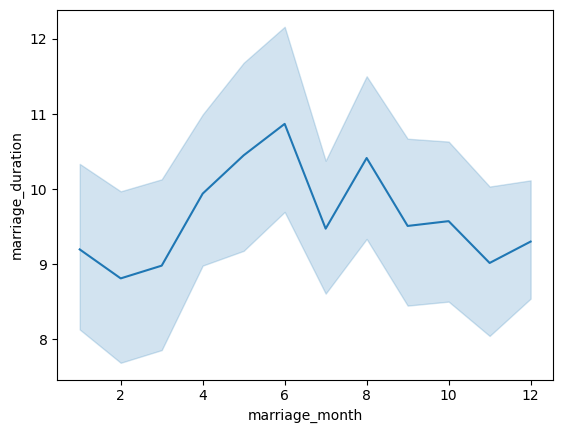

In [27]:
sns.lineplot(data=divorce, x='marriage_month', y='marriage_duration')
plt.show()

## Correlation

In [28]:
divorce.corr()

<ipython-input-28-f743e33fe38a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  divorce.corr()


,income_man,income_woman,marriage_duration,num_kids,marriage_month
income_man,1.000000,0.318047,0.085321,0.040848,0.013652
income_woman,0.318047,1.000000,0.078677,-0.018015,0.041441
marriage_duration,0.085321,0.078677,1.000000,0.447358,0.001433
num_kids,0.040848,-0.018015,0.447358,1.000000,-0.000551
marriage_month,0.013652,0.041441,0.001433,-0.000551,1.000000


<ipython-input-29-d1d9974d2581>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(divorce.corr(), annot=True)


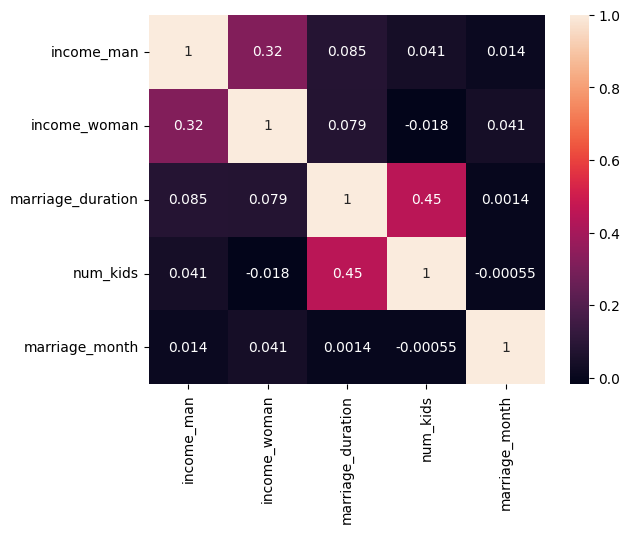

In [29]:
sns.heatmap(divorce.corr(), annot=True)
plt.show()